In [1]:
import math
from IPython.display import Image
from graphviz import Digraph

In [2]:
from labCode import *

### Bellman-Ford algorithm implementation

In [3]:
def BF(w, G):
    #initialise all distances as infinite 
    for v in G.vertices:
        v.estD = math.inf
        
    #distance from source to source must be 0
    w.estD = 0

    #bellman ford component

    #run the volume of edges possible from source to all others (volume of vectors - 1)
    for null in range(len(G.vertices) - 1):
        #iterate over all vertices u
        for u in G.vertices:
            #iterate over all outneighbours of u (v) with weight (wt)
            for v, wt in u.getOutNeighborsWithWeights():  
                #change the node distance value if the new distance is less than the previous
                if (u.estD != math.inf) and ((u.estD + wt) < v.estD):
                    v.estD = u.estD + wt

    #negative weight cycle check component

    #iterate over all vertices u
    for u in G.vertices:
        #iterate over all outneighbours of u (v) with weight (wt)
        for v, wt in u.getOutNeighborsWithWeights():
            #return if u distance + weight of edge is less than the distance of v
            if (u.estD != math.inf) and ((u.estD + wt) < v.estD):
                print("Negative weight cycle present")
                return

    return 

### Test 1: Basic graph with positive and negative weights

In [4]:
G1 = Graph()
for i in ['0', '1', '2', '3', '4', '5']:
    G1.addVertex( Node(i) )

In [5]:
V = G1.vertices

G1.addDiEdge( V[0], V[1],  8) 
G1.addDiEdge( V[0], V[2], 10) 
G1.addDiEdge( V[1], V[3],  1) 
G1.addDiEdge( V[3], V[2], -4) 
G1.addDiEdge( V[2], V[5],  2)
G1.addDiEdge( V[4], V[2],  1) 
G1.addDiEdge( V[3], V[5], -1)
G1.addDiEdge( V[5], V[4], -2) 

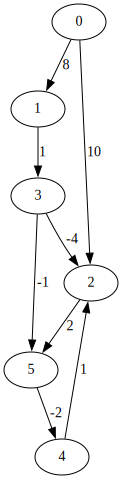

In [6]:
D1 = Digraph()

D1.edge('0', '1', label =  '8')
D1.edge('0', '2', label = '10')
D1.edge('1', '3', label =  '1')
D1.edge('3', '2', label = '-4')
D1.edge('2', '5', label =  '2')
D1.edge('4', '2', label =  '1')
D1.edge('3', '5', label = '-1')
D1.edge('5', '4', label = '-2')

D1

In [7]:
w = G1.vertices[0]
BF(w, G1)

In [8]:
print("From root: ", w.value)

for v in G1.vertices:
    print("Distance to node ", v.value, " = ", v.estD)

From root:  0
Distance to node  0  =  0
Distance to node  1  =  8
Distance to node  2  =  5
Distance to node  3  =  9
Distance to node  4  =  5
Distance to node  5  =  7


### Test 2: Negative weight cycle

In [9]:
G2 = Graph()
for i in ['0', '1', '2', '3', '4', '5']:
    G2.addVertex( Node(i) )

In [10]:
V = G2.vertices

G2.addDiEdge( V[0], V[1],  8)
G2.addDiEdge( V[0], V[2], 10)
G2.addDiEdge( V[1], V[3],  1) 
G2.addDiEdge( V[3], V[2], -4) 
G2.addDiEdge( V[2], V[5], -2)
G2.addDiEdge( V[4], V[2], -1) 
G2.addDiEdge( V[3], V[5], -1)
G2.addDiEdge( V[5], V[4], -2)

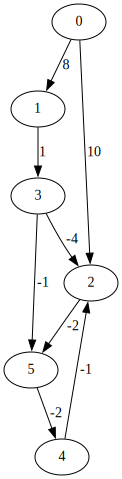

In [11]:
D2 = Digraph()

D2.edge('0', '1', label =  '8')
D2.edge('0', '2', label = '10')
D2.edge('1', '3', label =  '1')
D2.edge('3', '2', label = '-4')
D2.edge('2', '5', label = '-2')
D2.edge('4', '2', label = '-1')
D2.edge('3', '5', label = '-1')
D2.edge('5', '4', label = '-2')

D2

In [12]:
w = G2.vertices[0]
BF(w, G2)

Negative weight cycle present
